In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)

In [5]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
data.shape

(25, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


<AxesSubplot:>

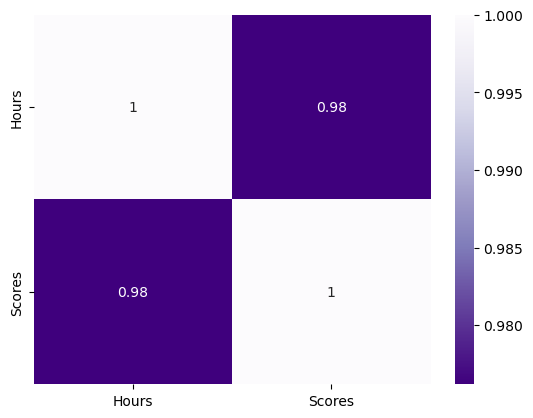

In [10]:
sns.heatmap(data=data.corr(), annot=True, cbar=True, cmap='Purples_r')

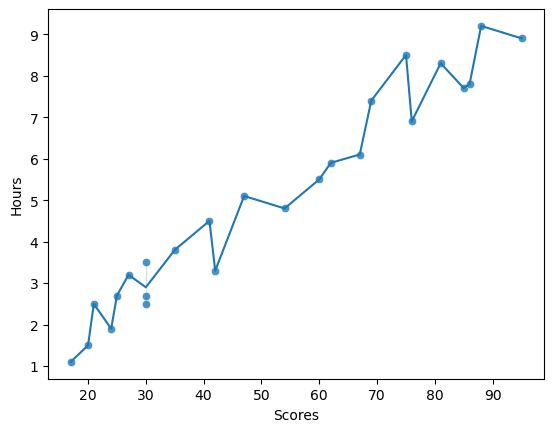

In [25]:
sns.scatterplot(x=data.Scores, y=data.Hours, data=data, ci='sd', alpha=0.8)
sns.lineplot(x=data.Scores, y=data.Hours, data=data, markers=True)
plt.show()

In [51]:
feature = np.array(data['Hours']).reshape(-1, 1)
target = np.array(data['Scores']).reshape(-1, 1)

In [52]:
print(f'Shape for the feature is {feature.shape}')
feature[:10]

Shape for the feature is (25, 1)


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7]])

In [53]:
print(f'Shape for the target data is {target.shape}')
target[:10]

Shape for the target data is (25, 1)


array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25]])

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=0)

In [56]:
X_train.shape

(20, 1)

In [57]:
y_test.shape

(5, 1)

In [58]:
y_train

array([[35],
       [24],
       [86],
       [76],
       [17],
       [47],
       [85],
       [42],
       [81],
       [88],
       [67],
       [30],
       [25],
       [60],
       [30],
       [75],
       [21],
       [54],
       [95],
       [41]])

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Training Completed!')

Training Completed!


In [61]:
print(f'The coefficient of the model is {model.coef_}')
print(f'The intercept of the model also is {model.intercept_}')

The coefficient of the model is [[9.91065648]]
The intercept of the model also is [2.01816004]


In [64]:
y_pred = model.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [67]:
print(f'Comparing our y_test values to the above predicted values')
y_test

Comparing our y_test values to the above predicted values


array([[20],
       [27],
       [69],
       [30],
       [62]])

In [70]:
# Given a student who studied 9.25 hours a day
hours = [[9.25]]
prediction = model.predict(hours)

In [72]:
print(f'The predicted score for such a student who studied for 9.25 hrs/day is {prediction.round(1)}')

The predicted score for such a student who studied for 9.25 hrs/day is [[93.7]]
